## Domain background

In this project, I will develop regression models to predict future stocks prices. Prediction of future stocks prices will help the user to develop a stretegy for a profitable investment and trading in stock market.

Investment firms, hedge funds and even individuals have been using financial models to better understand market behavior and make profitable investments and trades. A wealth of information is available in the form of historical stock prices and company performance data, suitable for machine learning algorithms to process.

For this project, I will build a stock price predictor that takes daily trading data over a certain date range as input, and outputs projected estimates for given query dates. The inputs will contain multiple metrics, such as opening price (Open), highest price the stock traded at (High), how many stocks were traded (Volume) and closing price adjusted for stock splits and dividends (Adjusted Close); the model will predict the Adjusted Close price. 

## A problem statement 

Use machine learning regression model to predict future stock prices in order to be able buy and sell stocks for maximum profit.  

## The datasets and inputs 

There are several open sources for historical stock price data which are free to use:

    Yahoo! Finance
    Bloomberg API
    Quandl
    Google Finance

I will be using Yahoo! Finance.


## A solution statement 

Historical stock price data from yahoo finance will be used to train regression models. Different regression models from scikit learn will be evaluated for this problem. 

## A benchmark model 

Trained Regression model will be tested on real "adjusted close" price of the stock. Predicted and real market data will be compared. 

## Evaluation metrics

The quality of prediction will be ensured using cross validation while training the model. The performance of the regressor will be quantified using r2_score and mean squared error. 

## Project design

A basic run of the core system would involve one call to the training interface, and one or more calls to the query interface. I will Implement a train-test cycle to measure the performance of the model. Use it to test prediction accuracy for query dates at different intervals after the training end date, e.g. the day immediately after training end date, 7 days later, 14 days, 28 days, etc.

First step is to get historical stock price data from yahoo finance. Here I will import Facebook's stock price data from July 01, 2011 to Jan 15, 2018. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr   # using pandas datareader to get the desired data
%matplotlib inline

fb = pdr.get_data_yahoo('FB', start='7/01/2012', end='1/15/2018')

Let's normalize the data with respect to the first day price.

In [2]:
fb = fb/(fb.iloc[0,:])
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-02,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
2012-07-03,0.98912,0.990860,1.008183,1.013975,1.013975,0.620564
2012-07-05,1.00224,0.996848,1.015385,1.022749,1.022749,0.710388
2012-07-06,1.00608,1.005358,1.023241,1.031199,1.031199,0.775074
2012-07-09,1.02720,1.036243,1.047136,1.045499,1.045499,1.259397


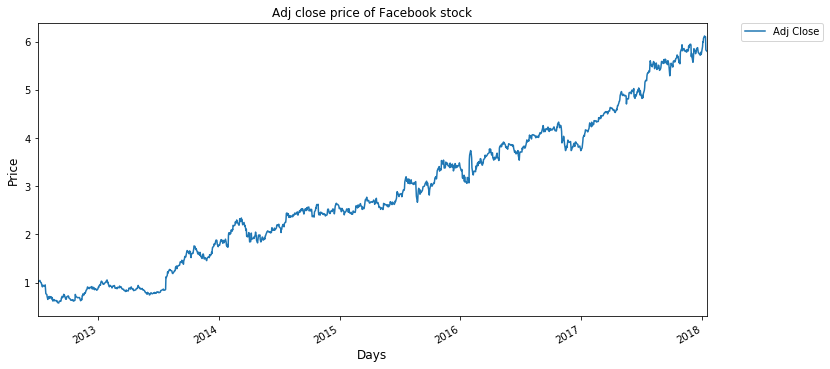

In [3]:
plt.figure(figsize=(12,6))
fb['Adj Close'].plot()
plt.xlabel('Days', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Adj close price of Facebook stock')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Let us add some more features to the data set. Here, we will calculated and add rolling mean, upper and lower bollinger band to the imported data.

In [4]:
rm_fb = fb['Adj Close'].rolling(20).mean()
rstd_fb = fb['Adj Close'].rolling(20).std()
upper_band_fb = rm_fb + rstd_fb * 2
lower_band_fb = rm_fb - rstd_fb * 2

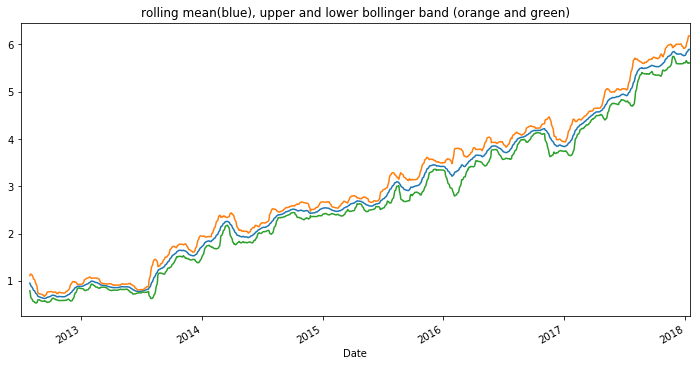

In [5]:
plt.figure(figsize=(12,6))
rm_fb.plot()
upper_band_fb.plot()
lower_band_fb.plot()
plt.title('rolling mean(blue), upper and lower bollinger band (orange and green)')
plt.show()

Now, adding calculated features to the data.

In [6]:
fb['rm_fb'] = rm_fb
fb['upper_band_fb'] = upper_band_fb
fb['lower_band_fb'] = lower_band_fb
fb.tail()

,Open,High,Low,Close,Adj Close,Volume,rm_fb,upper_band_fb,lower_band_fb
Date,,,,,,,,,
2018-01-09,6.03840,5.950205,6.124387,6.105622,6.105622,0.877574,5.861472,6.116031,5.606914
2018-01-10,5.98208,5.921525,6.076269,6.104647,6.104647,0.745638,5.875772,6.151457,5.600087
2018-01-11,6.02880,5.937598,6.133552,6.102373,6.102373,0.678983,5.893338,6.180111,5.606565
2018-01-12,5.69792,5.719508,5.806874,5.829379,5.829379,5.491524,5.895076,6.179743,5.610410
2018-01-16,5.80800,5.728018,5.827823,5.797530,5.797530,2.562229,5.895076,6.179743,5.610410


Let's now drop the NA values.

In [7]:
fb.dropna(axis=0)
len(fb)

1394

Now we will train a linear model from sklearn. Our target variable is "Adj Close" price of the stock five days later. 
To carry out this I appended a second "adjusted price" column to compare the price of the stock five days later. 
After	copying	over	the	column,	I	shifted	the	data	up	5	rows.		With	the	addition	of	this	new	column,	the	dataset	now	has	two	adjusted	price	datapoints	in	the	same	row:		current	price	and	the	stock	price	5-days	later.		With	this	information,	the	dataset	can	be	processed	by	a	machine	learning	algorithm	for	price	predictions,	and	calculate	the	variation	of	the	prediction	against	
the	actual	stock	price.	

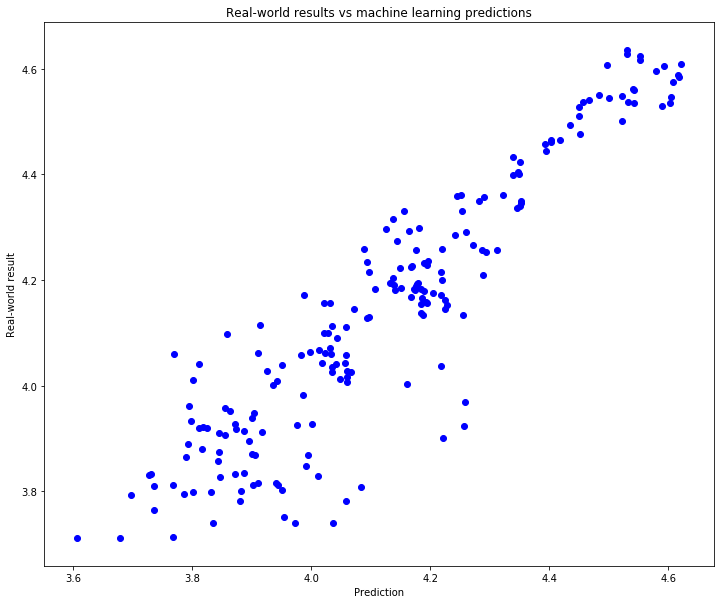

Score on training data
regr.score(X_train, y_train):  0.98981803248 

Score on testing (unseen) data
regr.score(X_test, y_test):  0.838206660647 

Mean squared error:  0.00994676858214 



In [8]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

fb['Adj_Close_5_Days_Later'] = fb['Adj Close']
fb['Adj_Close_5_Days_Later'] = fb['Adj_Close_5_Days_Later'].shift(-5)
X_train = fb.iloc[20:1000,:-1]
y_train = fb.iloc[20:1000, -1]
X_test = fb.iloc[1000:1200,:-1]
y_test = fb.iloc[1000:1200, -1]

regr = linear_model.LinearRegression()   # Create linear regression object
regr.fit(X_train, y_train)               # Train the model using the training sets
pred = regr.predict(X_test)              # Query

# Plot outputs
print "\n"
plt.figure(figsize=(12,10))
plt.title("Real-world results vs machine learning predictions")
plt.xlabel("Prediction")
plt.ylabel("Real-world result")
plt.scatter(regr.predict(X_test), y_test, color='blue')
plt.show()

print "Score on training data"
print "regr.score(X_train, y_train): ", regr.score(X_train, y_train), "\n"
print "Score on testing (unseen) data"
print "regr.score(X_test, y_test): ", regr.score(X_test, y_test), "\n"
print "Mean squared error: ", mean_squared_error(y_test, regr.predict(X_test)), "\n"

Here we observe a satisfactory regression score on training and testing data. The regression score (R2) will be used to compare different regression models the project. 